In [76]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from evclust.utils import plotting
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from evclust.utils import display_results_evidential, display_results_fuzzy_partition
from evclust.datasets import load_toys3c2d

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances: 600; Features: 2; Clusters: 2    3
dtype: int64
Instances 600 - Features 2 - Class 3
          0         1
0  0.840014 -0.865379
1  0.901840 -0.597634
2  0.114248 -0.282766
3  2.171705 -0.847531
4  1.099385  0.028547


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


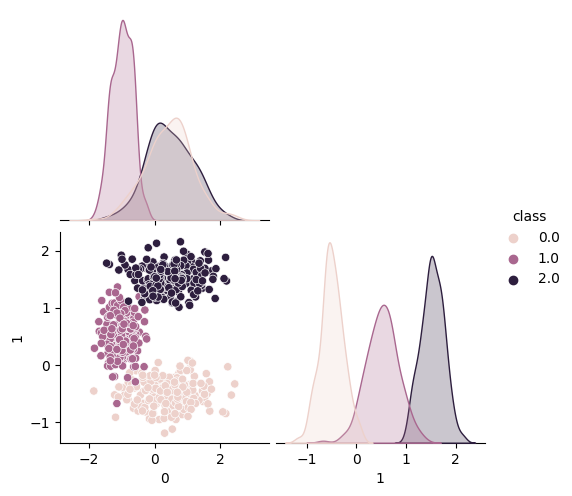

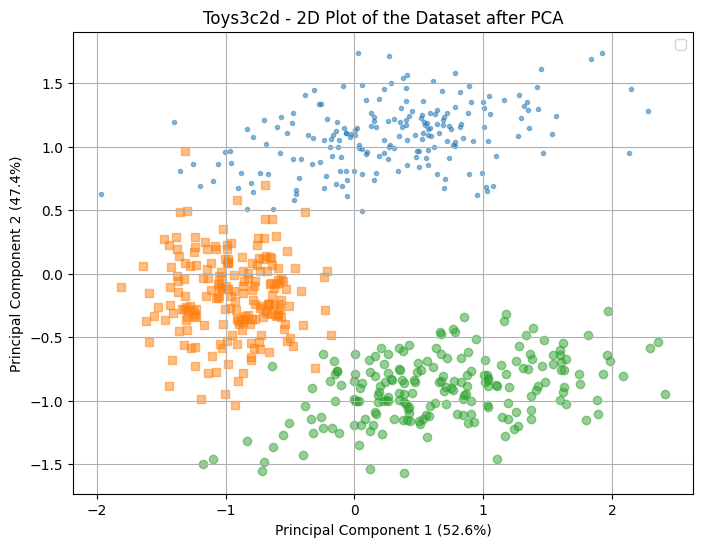

In [32]:
# fetch dataset 
df = load_toys3c2d()

# data (as pandas dataframes) 
X = df.iloc[:, :-1]
y = pd.DataFrame(df.iloc[:, -1])
c = 3

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")
plotting(X, y, "Toys3c2d", matrix_plot=True)

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

# Normalization
scaler = MinMaxScaler((0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

# ECM

In [33]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None")
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [6.984170457355065, 6.9846527347547545, 6.984764057713237, 6.984839509197152, 6.984896896318542, 6.984905405420899, 6.985096701351872, 6.985104064795545, 6.985253076029258, 6.985282965095829]
ARI values: [0.8671487353015035, 0.8623679881960941, 0.8719953579980222, 0.8719953579980222, 0.8623679881960941, 0.8623679881960941, 0.8719953579980222, 0.8719953579980222, 0.8623679881960941, 0.8528902928334252]
NS values: [1.1602067685467572, 1.1163198440448197, 1.1725817421274605, 1.117336899643315, 1.0354318150717055, 1.1784435022445188, 1.1181617432225737, 1.0385091134295676, 1.119972826456285, 1.1588554996560452]
NMI values: [0.8477271036779561, 0.843672692190521, 0.8520090484530056, 0.8520090484530057, 0.8436726921905211, 0.8436726921905211, 0.8520090484530057, 0.8520090484530055, 0.8436726921905211, 0.8358568366315584]


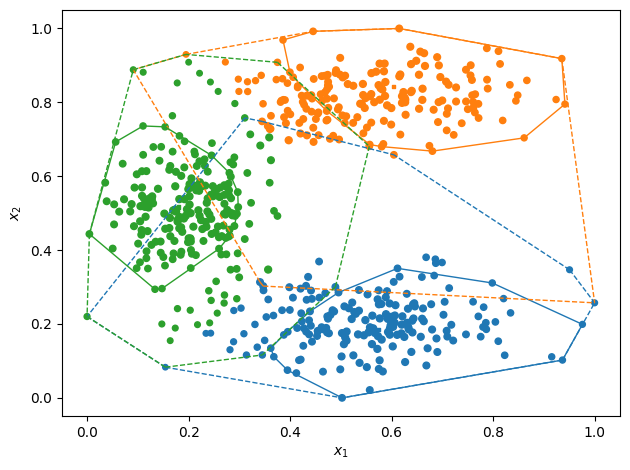

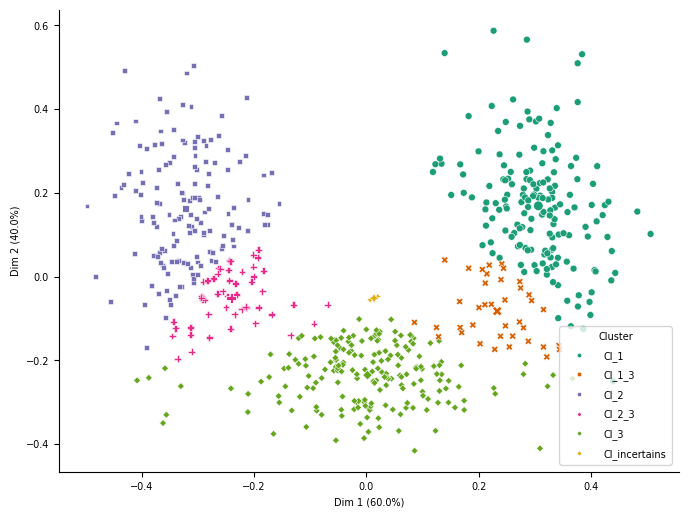

In [34]:

display_results_evidential(X, ecm_models, numeric_labels)

# WECM

In [87]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None")
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.7475130640867282, 0.8816668397430067, 0.9552646569515431, 0.9990541145526375, 0.9991898627095535, 0.9997775526251689, 1.0704960953346596, 1.2468565120871546, 1.4049359361503613, 1.4815885266708073]
ARI values: [0.9315165967217252, 0.7664005221492831, 0.9115449844924367, 0.36395500744051, 0.36499483572109287, 0.36395500744051, 0.45792177590253197, 0.2265840106964585, 0.257131420179848, 0.20363268903821896]
NS values: [1.8873119383942776, 1.7604402498636897, 1.786665946458908, 1.7818992058726788, 1.7745600114902307, 1.627995144623164, 1.3426188555080454, 2.100615342056098, 2.1409687948622516, 1.7718020613504515]
NMI values: [0.8951554712266343, 0.7391686521883503, 0.8736653259289837, 0.37344766700854465, 0.37420914806554517, 0.3734476670085447, 0.5684327618600833, 0.26852066551889137, 0.3063701246978874, 0.3104789086555949]


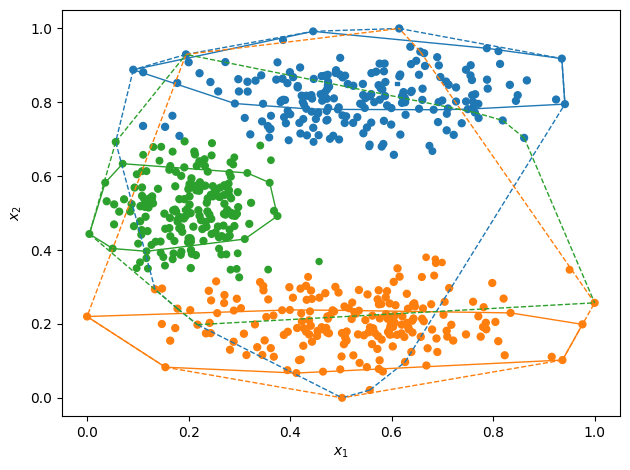

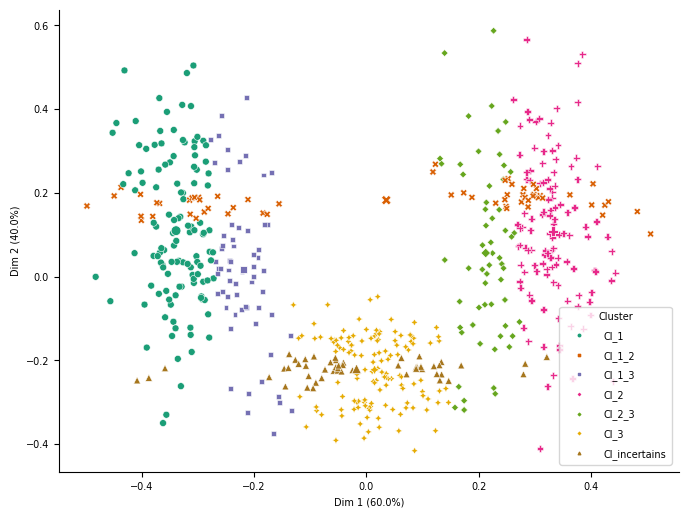

In [88]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [85]:
%%capture
keller_models = np.array([])
w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, w0=w0, verbose=True, init="None")
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [1.8378920545757758, 1.8379401874542676, 1.83803732602522, 1.838061832065669, 1.838069753390017, 1.838142629646124, 1.8381764549346715, 1.838201752797747, 2.402608666792518, 2.4035346012695005]
ARI values: [0.9362798230183395, 0.9362798230183395, 0.9362798230183395, 0.9362798230183395, 0.9362798230183395, 0.9362798230183395, 0.9362798230183395, 0.9362798230183395, 0.37532823259203857, 0.382235974618928]
NMI values: [0.9008750787020033, 0.9008750787020033, 0.9008750787020033, 0.9008750787020033, 0.9008750787020033, 0.9008750787020033, 0.9008750787020033, 0.9008750787020033, 0.37879477325282623, 0.3868959813649556]


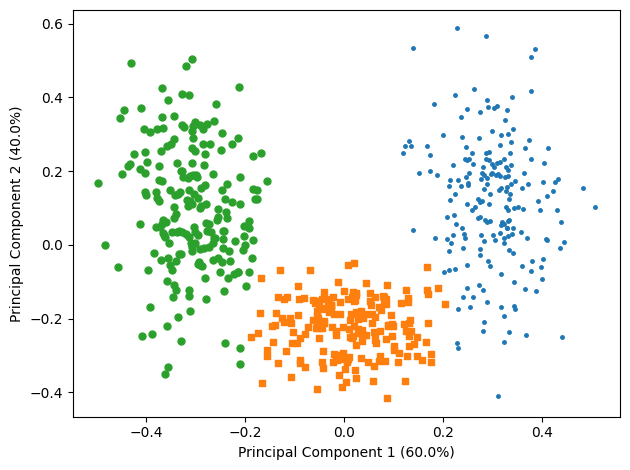

In [86]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# WFCM Wang2004

In [9]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=2.8, verbose=True, init="None")
    wang_models = np.append(wang_models, model)

J values: [2.526350437341222, 2.5262467070181773]
ARI values: [0.8847904558240312, 0.8802091363575055]
NMI values: [0.8404890179802031, 0.8353787498655124]


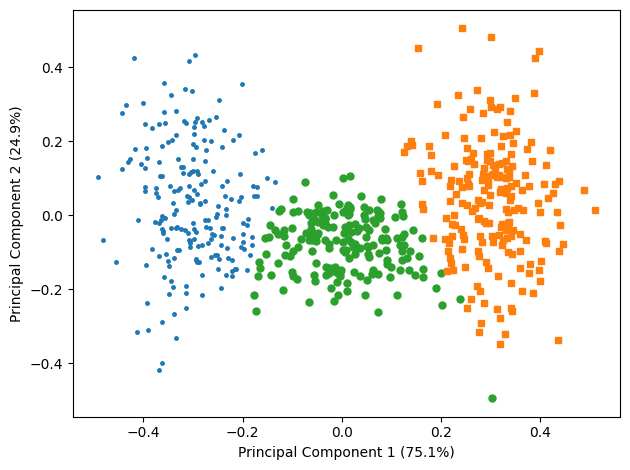

In [10]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [43]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, init="None")
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])

J values: [15.427525188886735, 15.427531586203608, 15.427538735497878, 15.427552426024906, 15.427677721785885, 15.427809853687286, 15.427829395493234, 15.427863291089029, 15.428001259244137, 15.428093087449334]
ARI values: [0.916163105703676, 0.916163105703676, 0.916163105703676, 0.916163105703676, 0.916163105703676, 0.916163105703676, 0.916163105703676, 0.916163105703676, 0.916163105703676, 0.9114129554638088]
NMI values: [0.8947138581773003, 0.8947138581773005, 0.8947138581773003, 0.8947138581773005, 0.8947138581773003, 0.8947138581773005, 0.8947138581773005, 0.8947138581773003, 0.8947138581773005, 0.8904766114916849]


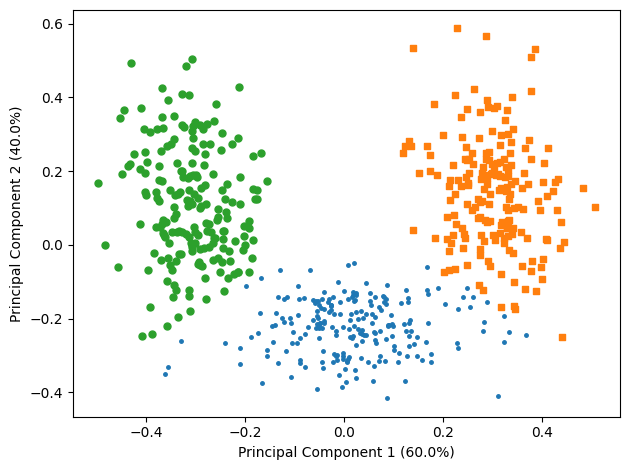

In [44]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [81]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None")
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])

J values: [1.9052229867398625, 1.9056186345898052, 1.9066070748242903, 1.9068485889759699, 1.9071322160374016, 1.9072891621967196, 1.9073504148977034, 1.9074400626935195, 1.907507491947254, 1.9076078699111731]
ARI values: [0.9653218586747573, 0.9653218586747573, 0.9653218586747573, 0.9653218586747573, 0.9653218586747573, 0.9653218586747573, 0.9653218586747573, 0.9653218586747573, 0.9653218586747573, 0.9653218586747573]
NMI values: [0.940294477291009, 0.9402944772910092, 0.940294477291009, 0.940294477291009, 0.9402944772910092, 0.940294477291009, 0.940294477291009, 0.940294477291009, 0.940294477291009, 0.940294477291009]


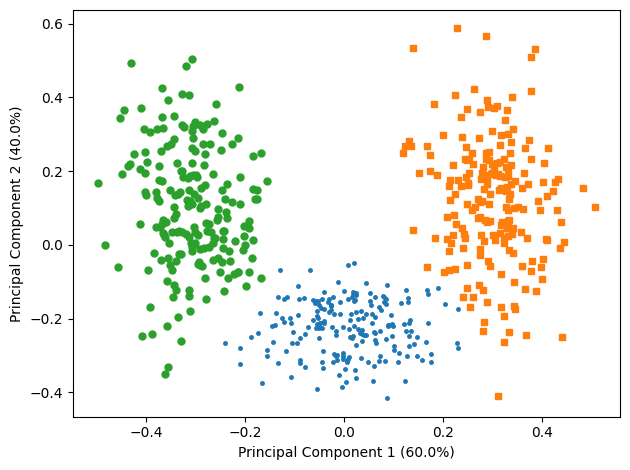

In [82]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [51]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None", epsilon=1e-6)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [2.847154695578399, 2.847154782449429, 2.847166719520559, 2.8471667660594493, 2.8471667721677445, 2.8471670983392037, 2.847167174300324, 2.8471673703232767, 2.8471674117407035, 2.9350578787006234]
ARI values: [0.8342729633927588, 0.8342729633927588, 0.8342729633927588, 0.8342729633927588, 0.8342729633927588, 0.8342729633927588, 0.8342729633927588, 0.8342729633927588, 0.8342729633927588, 0.3781115441636634]
NMI values: [0.8212428266021577, 0.8212428266021577, 0.8212428266021577, 0.8212428266021577, 0.8212428266021577, 0.8212428266021577, 0.8212428266021577, 0.8212428266021577, 0.8212428266021577, 0.3818892731629136]


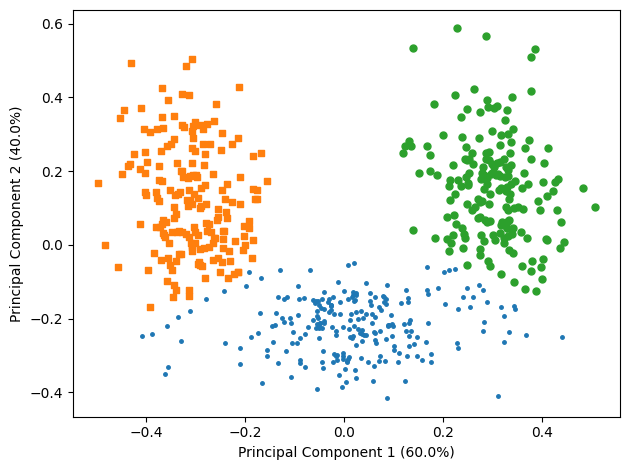

In [52]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [61]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [35.34046237008182, 35.3404623751956, 35.340462442409596, 35.34046248652689, 35.34046291921881, 35.340462931964225, 35.340462960168324, 39.03371954993901, 39.033721889731524, 39.03372191401739]
ARI values: [0.941172333572704, 0.941172333572704, 0.941172333572704, 0.941172333572704, 0.941172333572704, 0.941172333572704, 0.941172333572704, 0.38492498402811326, 0.38492498402811326, 0.38492498402811326]
NMI values: [0.9140136634302253, 0.9140136634302253, 0.9140136634302253, 0.9140136634302253, 0.9140136634302253, 0.9140136634302253, 0.9140136634302253, 0.38966254311315607, 0.38966254311315607, 0.38966254311315607]


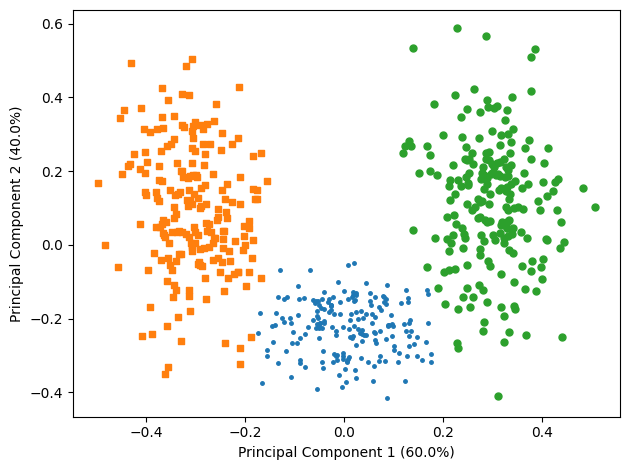

In [62]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)